In [1]:
#importing All Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import seaborn as sns

In [2]:
#importing DataSet
dataset1 = pd.read_csv("data_preprocessing.csv")

In [3]:
#Taking Original Copy of Dataset
dataset =dataset1.copy()

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Country      10 non-null object
Age          9 non-null float64
Salary       9 non-null float64
Purchased    10 non-null object
dtypes: float64(2), object(2)
memory usage: 400.0+ bytes


In [5]:
dataset.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In [6]:
#Checking dataset value is Empty?
dataset.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [7]:
# Replace NaN values into Mean() of Dataset
dataset.replace(np.NaN, dataset.mean(), inplace=True)

In [8]:
dataset

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


In [9]:
# Creating Categorical Values into Numerical Values

new_dataset= pd.get_dummies(dataset,columns=['Country','Purchased'])
new_dataset

,Age,Salary,Country_France,Country_Germany,Country_Spain,Purchased_No,Purchased_Yes
0,44.000000,72000.000000,1,0,0,1,0
1,27.000000,48000.000000,0,0,1,0,1
2,30.000000,54000.000000,0,1,0,1,0
3,38.000000,61000.000000,0,0,1,1,0
4,40.000000,63777.777778,0,1,0,0,1
5,35.000000,58000.000000,1,0,0,0,1
6,38.777778,52000.000000,0,0,1,1,0
7,48.000000,79000.000000,1,0,0,0,1
8,50.000000,83000.000000,0,1,0,1,0
9,37.000000,67000.000000,1,0,0,0,1


In [10]:
# Drop Unwanted Column Values values from Datasets
pd.DataFrame(dataset.drop(['Country','Purchased'], axis =1,inplace = True))

""


In [11]:
dataset

,Age,Salary
0,44.000000,72000.000000
1,27.000000,48000.000000
2,30.000000,54000.000000
3,38.000000,61000.000000
4,40.000000,63777.777778
5,35.000000,58000.000000
6,38.777778,52000.000000
7,48.000000,79000.000000
8,50.000000,83000.000000
9,37.000000,67000.000000


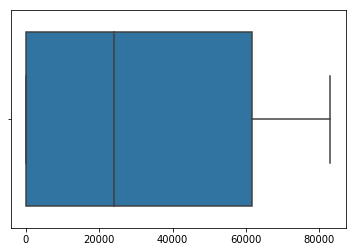

In [12]:
sns.boxplot(dataset)

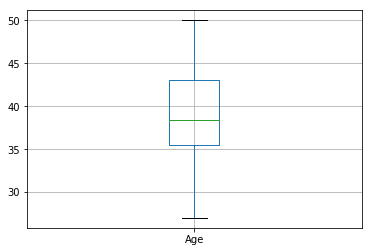

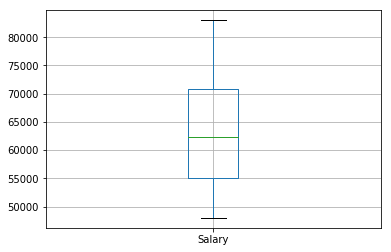

In [13]:
# plot boxplot of different columns of  Dataset  to see any Outlier
for col in dataset:
    plt.figure()
    dataset.boxplot([col])

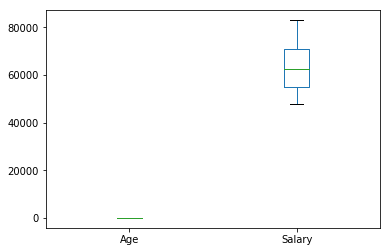

In [14]:
# plot boxplot of different columns on same graph to see different ranges.

dataset.plot(kind='box')

In [15]:
# Remove Outlier
low = .05
high = .95
quant_df = dataset.quantile([low, high])
quant_df



,Age,Salary
0.05,28.35,49800.0
0.95,49.10,81200.0


In [16]:
# quant_index = ((quant_df[low]<quant_df.Values.value) &(quant_df.Values.valve<quant_df.loc[high]))

Q1 =  dataset['Age'].quantile(0.05)
Q3 =  dataset['Age'].quantile(0.95)
IQR = Q3 - Q1
print(IQR)

20.749999999999993


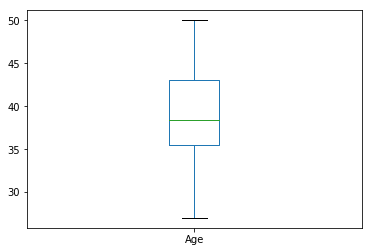

In [17]:
# Remove Outliers
dataset[(dataset['Age'] < Q1-1.5*IQR ) | (dataset['Age'] > Q3+1.5*IQR)]['Age']
dataset['Age'].plot(kind='box')

In [18]:
# Feature Scalling using Normalization
data_module= (dataset - dataset.min())/(dataset.max()-dataset.min())
data_module

,Age,Salary
0,0.739130,0.685714
1,0.000000,0.000000
2,0.130435,0.171429
3,0.478261,0.371429
4,0.565217,0.450794
5,0.347826,0.285714
6,0.512077,0.114286
7,0.913043,0.885714
8,1.000000,1.000000
9,0.434783,0.542857


In [19]:
# Feature Scalling using Standardization 
dataset[:] = pd.DataFrame(preprocessing.StandardScaler().fit(dataset).transform(dataset))
dataset

,Age,Salary
0,0.758874,7.494733e-01
1,-1.711504,-1.438178e+00
2,-1.275555,-8.912655e-01
3,-0.113024,-2.532004e-01
4,0.177609,6.632192e-16
5,-0.548973,-5.266569e-01
6,0.000000,-1.073570e+00
7,1.340140,1.387538e+00
8,1.630773,1.752147e+00
9,-0.258340,2.937125e-01


In [20]:
"""
x= (dataset["Age"])
y = (dataset["Salary"])

train_data = int(0.80 *len(dataset))
test_data = int(0.20 * len(dataset))

print("Train_Data", train_data)
print("Test_Data", test_data)

"""

'\nx= (dataset["Age"])\ny = (dataset["Salary"])\n\ntrain_data = int(0.80 *len(dataset))\ntest_data = int(0.20 * len(dataset))\n\nprint("Train_Data", train_data)\nprint("Test_Data", test_data)\n\n'

In [21]:
"""
train_data_x = np.array(x[:train_data])
train_data_y = np.array(y[:train_data])

test_data_x = np.array(x[train_data:])
test_data_y = np.array(y[train_data:])
print(test_data_x)

""""

SyntaxError: EOL while scanning string literal (<ipython-input-21-b8e8188ba0cf>, line 9)

In [22]:
"""
print("Train_Data_x\n",train_data_x,"\n")
print("Train_Data_y\n",train_data_y,"\n")
print("Test_Data_x\n",test_data_x,"\n")
print("Test_Data_y\n",test_data_y,"\n")
"""

'\nprint("Train_Data_x\n",train_data_x,"\n")\nprint("Train_Data_y\n",train_data_y,"\n")\nprint("Test_Data_x\n",test_data_x,"\n")\nprint("Test_Data_y\n",test_data_y,"\n")\n'

In [23]:
# split dataset into Training and testing

def split(data_module):
    
    x = (data_module["Age"]) 
    y = (data_module["Salary"])
    
    train_data = int(0.70*len(data_module))     
    test_data = len(data_module) - train_data 
    
    print("train data", train_data)
    print("Test data", test_data)
    
    train_data_array_x = np.array(x[:train_data]) 
    train_data_array_y =np.array(y[:train_data])
    test_data_array_x = np.array(x[train_data:])
    test_data_array_y = np.array(y[train_data:]) 
    
    return train_data_array_x,train_data_array_y,test_data_array_x,test_data_array_y



In [24]:
train_data_array_x,train_data_array_y,test_data_array_x,test_data_array_y = split(dataset)
train_data_array_x.shape, test_data_array_x.shape


train data 7
Test data 3


((7,), (3,))